In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/CDC_Project")
# Now you can list files in that directory
!ls


 Baseline_models_and_Grad-Cam18.ipynb   preprocessing.ipynb
 Baseline_models_and_Grad-Cam.ipynb     __pycache__
 best_multimodal_model.pt	        tabular_preprocessed.joblib
 Mapbox_api.ipynb		        test2.csv
 map_images			       'train(1).csv'
 model_training.ipynb		        train_config.json
 modular.py			        training_loop18.ipynb
 outputs			        training_loop.ipynb
 preprocessing18.ipynb


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor


In [ ]:
train = pd.read_csv('train(1).csv')
train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,5272200045,20141113T000000,378000,3,1.50,1000,6914,1.0,0,0,...,7,1000,0,1947,0,98125,47.7144,-122.319,1000,6947
16205,9578500790,20141111T000000,399950,3,2.50,3087,5002,2.0,0,0,...,8,3087,0,2014,0,98023,47.2974,-122.349,2927,5183
16206,7202350480,20140930T000000,575000,3,2.50,2120,4780,2.0,0,0,...,7,2120,0,2004,0,98053,47.6810,-122.032,1690,2650
16207,1723049033,20140620T000000,245000,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000


In [ ]:
test = pd.read_csv('test2.csv')
test

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5399,7732500270,20140925T000000,4,2.50,2820,15000,2.0,0,0,4,9,2820,0,1985,0,98052,47.7255,-122.101,2440,15000
5400,3856903515,20141222T000000,3,2.00,1460,6250,1.5,0,0,4,7,1460,0,1912,0,98103,47.6693,-122.333,1690,4750
5401,2557000400,20150409T000000,3,2.50,2070,9900,1.0,0,0,3,8,1420,650,1979,0,98023,47.2988,-122.371,2070,8250
5402,4386700135,20141114T000000,4,2.25,4760,8036,2.5,0,0,5,9,3390,1370,1916,0,98112,47.6415,-122.285,2950,9323


In [ ]:
train.shape, test.shape

((16209, 21), (5404, 20))

In [ ]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.620900e+04,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,4.575771e+09,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,3.407860,7.652971,1784.754396,288.520205,1971.152755,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707
std,2.874661e+09,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,0.651553,1.171050,821.820844,438.598910,29.372698,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012
min,1.000102e+06,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000
50%,3.904950e+09,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000
75%,7.304301e+09,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000
max,9.900000e+09,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [ ]:
train.isnull().sum().sort_values(ascending=False)


,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
invalid_sqft = train[
    train["sqft_living"] !=
    (train["sqft_above"] + train["sqft_basement"])]

print("Invalid rows:", invalid_sqft.shape[0])


Invalid rows: 0


In [ ]:
train.duplicated().sum()


np.int64(0)

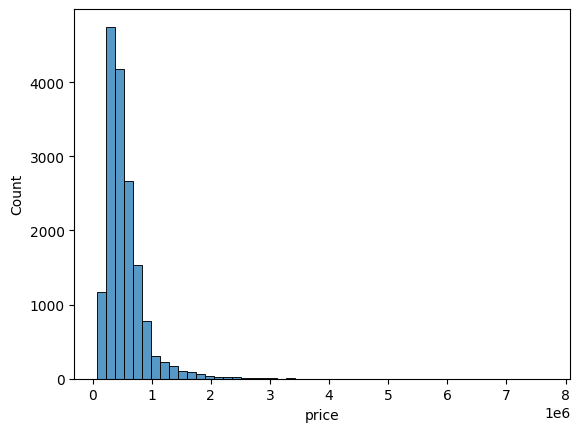

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(train["price"], bins=50)
plt.show()


In [ ]:
import numpy as np

train['price_log'] = np.log1p(train['price'])


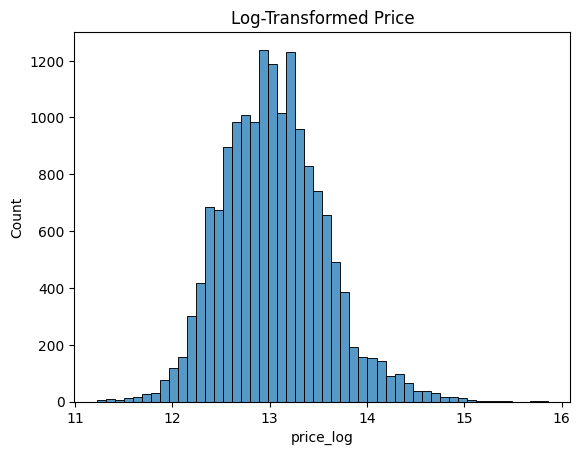

In [ ]:
sns.histplot(train["price_log"], bins=50)
plt.title("Log-Transformed Price")
plt.show()


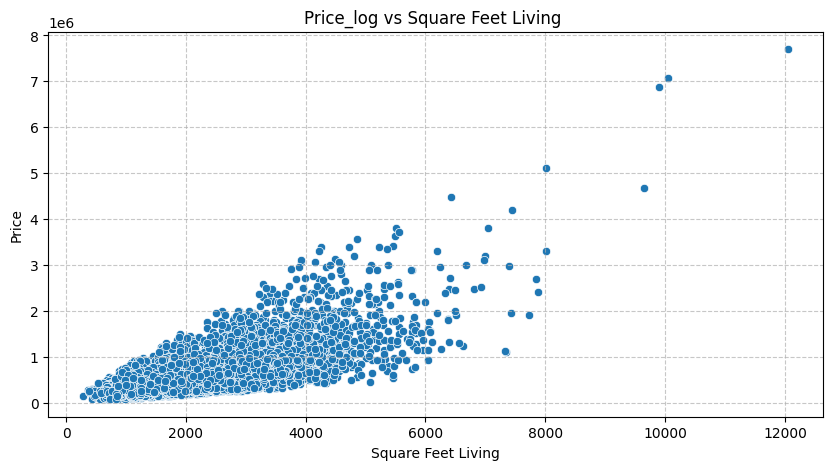

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.scatterplot(x='sqft_living', y='price', data=train)
plt.title('Price_log vs Square Feet Living ')
plt.xlabel('Square Feet Living')
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

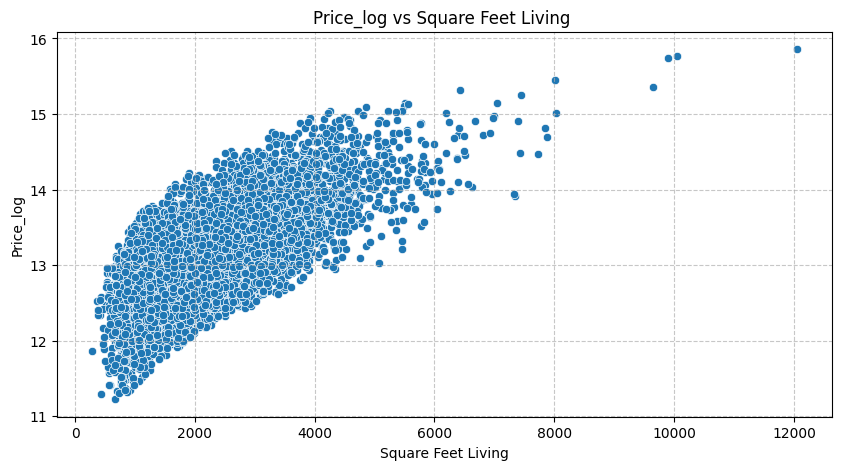

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.scatterplot(x='sqft_living', y='price_log', data=train)
plt.title('Price_log vs Square Feet Living ')
plt.xlabel('Square Feet Living')
plt.ylabel('Price_log')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

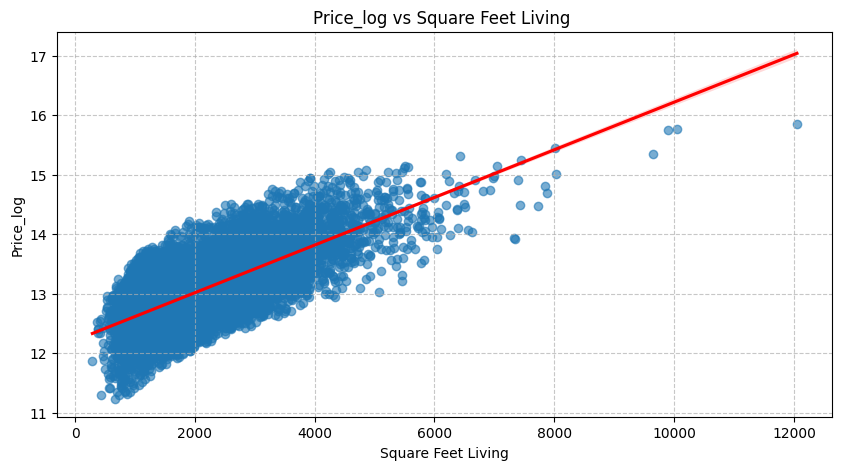

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

sns.regplot(x='sqft_living', y='price_log', data=train, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Price_log vs Square Feet Living ')
plt.xlabel('Square Feet Living')
plt.ylabel('Price_log')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

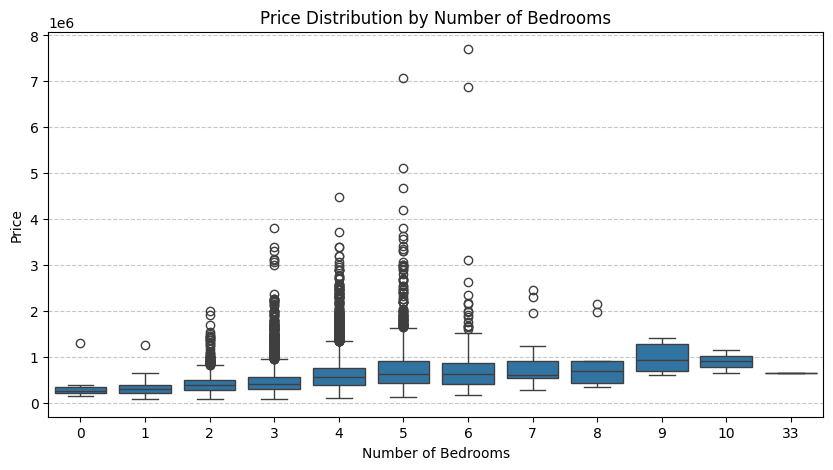

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x='bedrooms', y='price', data=train)
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

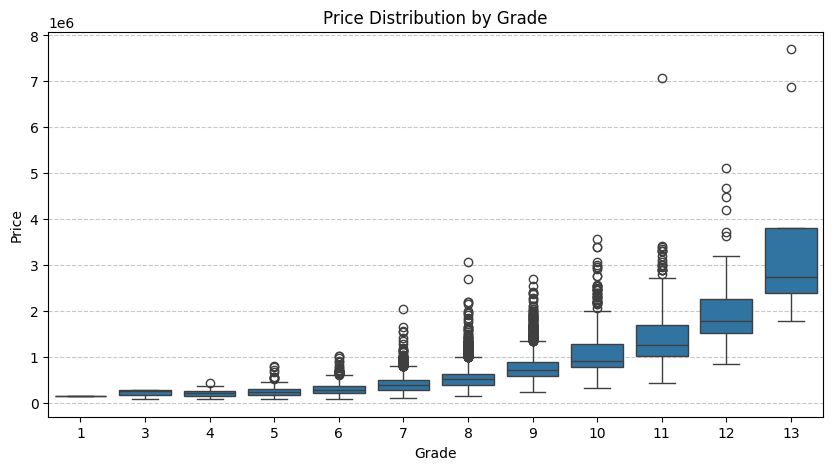

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x='grade', y='price', data=train)
plt.title('Price Distribution by Grade')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

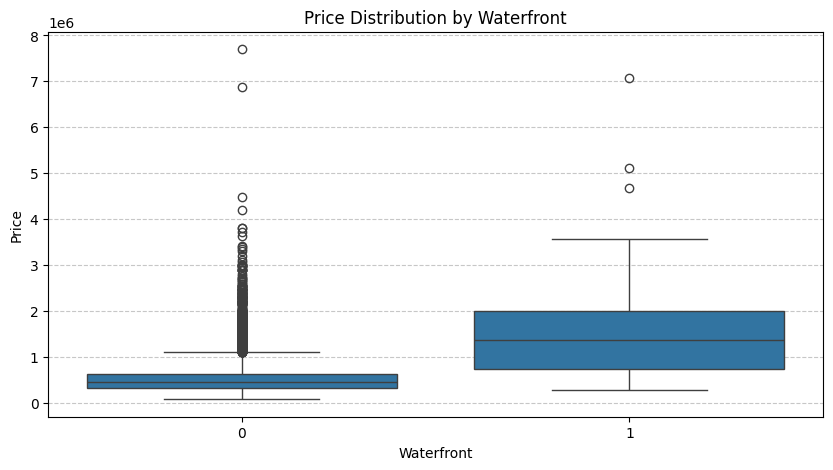

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(
    x=train["waterfront"],
    y=train["price"]
)
plt.title('Price Distribution by Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

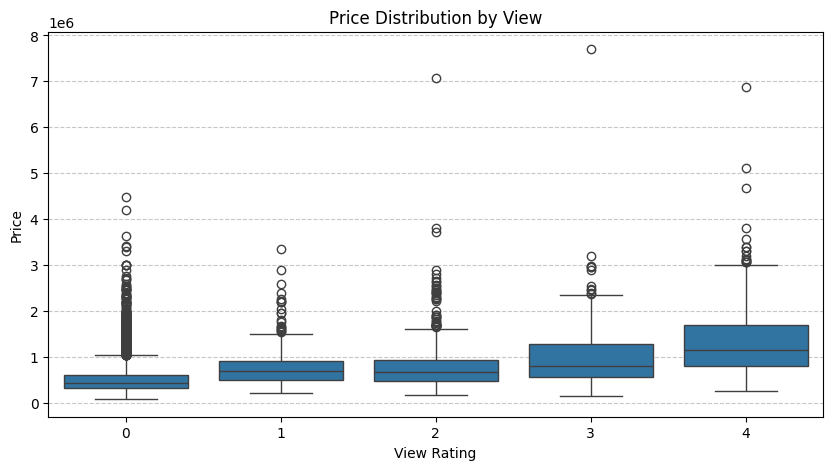

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x='view', y='price', data=train)
plt.title('Price Distribution by View')
plt.xlabel('View Rating')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import pandas as pd


correlated_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'
]

correlation_matrix = train[correlated_columns].corr()
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print("Columns in decreasing order of correlation with price:")
price_correlations

Columns in decreasing order of correlation with price:


,price
price,1.000000
sqft_living,0.700933
grade,0.664266
sqft_above,0.602648
sqft_living15,0.581781
bathrooms,0.525487
view,0.390534
sqft_basement,0.320301
lat,0.310008
bedrooms,0.304454


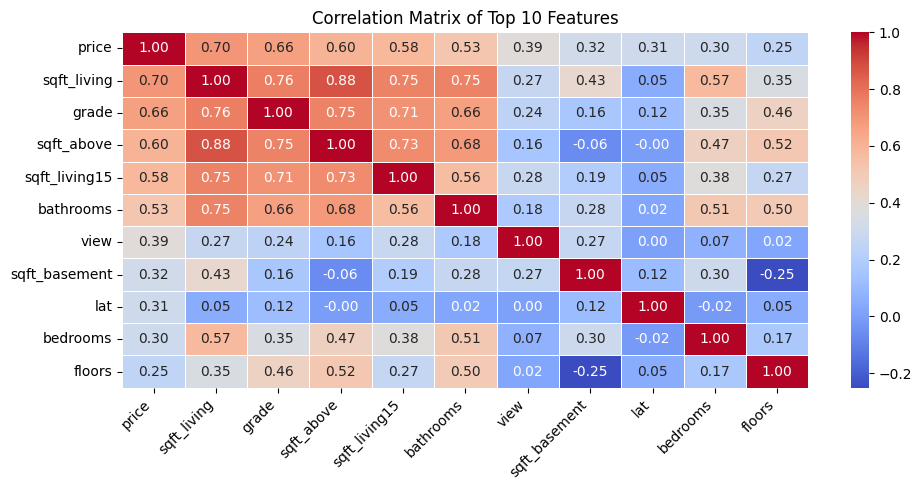

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_feature_names = price_correlations.drop('price').head(10).index.tolist()

columns_for_heatmap = ['price'] + top_10_feature_names

correlation_matrix_top_features = train[columns_for_heatmap].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix_top_features, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Top 10 Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

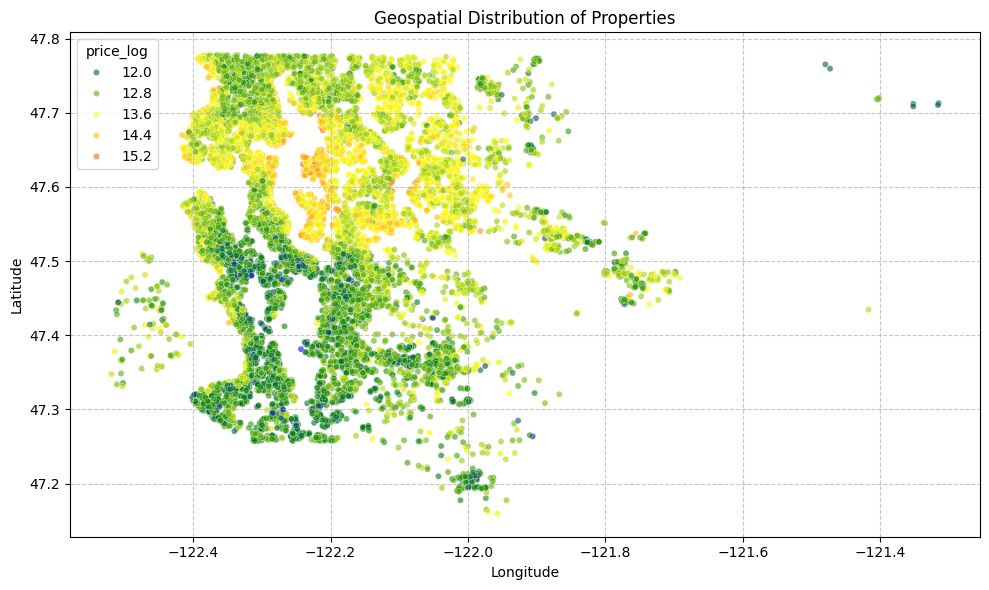

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

colors = [(0, 'blue'), (0.25, 'green'), (0.5, 'yellow'), (0.75, 'orange'), (1, 'red')]
custom_cmap = LinearSegmentedColormap.from_list("BlueGreenYellowOrangeRed", colors)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='long', y='lat', hue='price_log', data=train, palette=custom_cmap, alpha=0.6, s=20)
plt.title('Geospatial Distribution of Properties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_log'],
      dtype='object')

In [ ]:
train['yr_renovated'].describe()

,yr_renovated
count,16209.000000
mean,82.738108
std,397.861148
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2015.000000


In [ ]:
train['yr_renovated'].value_counts().sort_values(ascending=False)

,count
yr_renovated,
0,15537
2014,68
2005,31
2003,27
2000,27
...,...
1934,1
1951,1
1948,1


In [ ]:
train['yr_built'].describe()

,yr_built
count,16209.000000
mean,1971.152755
std,29.372698
min,1900.000000
25%,1952.000000
50%,1975.000000
75%,1997.000000
max,2015.000000


In [ ]:
train['yr_built'].value_counts().sort_values(ascending=False).head(10)

,count
yr_built,
2014,415
2006,347
2005,346
2004,330
2007,323
2003,321
1977,311
1978,290
2008,289


In [ ]:
train['year'] = train['date'].str.slice(0, 4).astype(int)
test['year'] = test['date'].str.slice(0, 4).astype(int)

In [ ]:
train['year'].describe()

,year
count,16209.000000
mean,2014.321982
std,0.467250
min,2014.000000
25%,2014.000000
50%,2014.000000
75%,2015.000000
max,2015.000000


In [ ]:
train['year'].value_counts().sort_values(ascending=False)

,count
year,
2014,10990
2015,5219


In [ ]:

train["time_built"] = train["year"] - train["yr_built"]


train["time_renovated"] = np.where(
    train["yr_renovated"] > 0,
    train["year"] - train["yr_renovated"],
    train["time_built"]
)


In [ ]:
test["time_built"] = test["year"] - test["yr_built"]

test['time_renovated'] = np.where(
    test["yr_renovated"] > 0,
    test["year"] - test["yr_renovated"],
    test["time_built"]
)

In [ ]:
train["time_built"] = train["time_built"].clip(lower=0, upper=150)
train["time_renovated"] = train["time_renovated"].clip(lower=0, upper=150)
test["time_built"] = test["time_built"].clip(lower=0, upper=150)
test["time_renovated"] = test["time_renovated"].clip(lower=0, upper=150)


In [ ]:
train["built_log"] = np.log1p(train["time_built"])
train["renovation_log"] = np.log1p(train["time_renovated"])

test["built_log"] = np.log1p(test["time_built"])
test["renovation_log"] = np.log1p(test["time_renovated"])


In [ ]:
train['time_renovated'].describe()

,time_renovated
count,16209.000000
mean,1931.583873
std,397.872693
min,-1.000000
25%,2014.000000
50%,2014.000000
75%,2015.000000
max,2015.000000


In [ ]:
X_test = test.copy()

In [ ]:
train["living_ratio"] = train["sqft_living"] / train["sqft_living15"]
train["lot_ratio"] = train["sqft_lot"] / train["sqft_lot15"]

X_test["living_ratio"] = X_test["sqft_living"] / X_test["sqft_living15"]
X_test["lot_ratio"] = X_test["sqft_lot"] / X_test["sqft_lot15"]

In [ ]:
train["has_basement"] = (train["sqft_basement"] > 0).astype(int)
X_test["has_basement"] = (X_test["sqft_basement"] > 0).astype(int)

train["quality_score"] = train["grade"] * train["condition"]
X_test["quality_score"] = X_test["grade"] * X_test["condition"]


In [ ]:
skewed_cols = [
    "sqft_living", "sqft_lot",
    "sqft_living15", "sqft_lot15"]

for col in skewed_cols:
    train[col] = np.log1p(train[col])

    X_test[col] = np.log1p(X_test[col])

In [ ]:
train2 = train.drop(columns = ['price','price_log'])

In [ ]:
train2

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_lot15,year,time_built,time_renovated,built_log,renovation_log,living_ratio,lot_ratio,has_basement,quality_score
0,9117000170,20150505T000000,4,2.25,7.501634,9.131405,2.0,0,0,3,...,9.131405,2015,54,54,4.007333,4.007333,1.090361,1.000000,0,21
1,6700390210,20140708T000000,3,2.50,7.378384,7.933438,2.0,0,0,4,...,8.190354,2014,22,22,3.135494,3.135494,0.930233,0.773370,0,28
2,7212660540,20150115T000000,4,2.50,7.450661,9.064042,2.0,0,0,3,...,8.916774,2015,21,21,3.091042,3.091042,0.919786,1.158685,0,24
3,8562780200,20150427T000000,2,2.25,7.123673,6.559615,2.0,0,0,3,...,6.621406,2015,6,6,1.945910,1.945910,1.000000,0.940000,1,21
4,7760400350,20141205T000000,3,2.00,7.155396,9.499796,1.0,0,0,3,...,8.996157,2014,20,20,3.044522,3.044522,0.805031,1.654814,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,5272200045,20141113T000000,3,1.50,6.908755,8.841448,1.0,0,0,3,...,8.846209,2014,67,67,4.219508,4.219508,1.000000,0.995250,0,21
16205,9578500790,20141111T000000,3,2.50,8.035279,8.517793,2.0,0,0,3,...,8.553332,2014,0,0,0.000000,0.000000,1.054663,0.965078,0,24
16206,7202350480,20140930T000000,3,2.50,7.659643,8.472405,2.0,0,0,3,...,7.882692,2014,10,10,2.397895,2.397895,1.254438,1.803774,0,21
16207,1723049033,20140620T000000,1,0.75,5.942799,9.615872,1.0,0,0,3,...,9.615872,2014,51,51,3.951244,3.951244,0.324786,1.000000,0,15


In [ ]:
targets = train['price_log']

In [ ]:
X_test

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_lot15,year,time_built,time_renovated,built_log,renovation_log,living_ratio,lot_ratio,has_basement,quality_score
0,2591820310,20141006T000000,4,2.25,7.635787,9.093132,2.0,0,0,4,...,8.949105,2014,28,28,3.367296,3.367296,0.866109,1.154935,0,32
1,7974200820,20140821T000000,5,3.00,7.972811,8.814479,1.0,0,0,5,...,8.745762,2014,37,37,3.637586,3.637586,1.223629,1.071144,1,40
2,7701450110,20140815T000000,4,2.50,8.235095,9.295967,2.0,0,2,3,...,9.178437,2014,17,17,2.890372,2.890372,1.016173,1.124729,0,33
3,9522300010,20150331T000000,3,3.50,8.425297,9.589393,2.0,0,2,3,...,9.562897,2015,25,25,3.258097,3.258097,1.125926,1.026852,0,36
4,9510861140,20140714T000000,3,2.50,7.844241,8.589886,2.0,0,0,3,...,8.306719,2014,10,10,2.397895,2.397895,1.133333,1.327407,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5399,7732500270,20140925T000000,4,2.50,7.944847,9.615872,2.0,0,0,4,...,9.615872,2014,29,29,3.401197,3.401197,1.155738,1.000000,0,36
5400,3856903515,20141222T000000,3,2.00,7.286876,8.740497,1.5,0,0,4,...,8.466110,2014,102,102,4.634729,4.634729,0.863905,1.315789,0,28
5401,2557000400,20150409T000000,3,2.50,7.635787,9.200391,1.0,0,0,3,...,9.018090,2015,36,36,3.610918,3.610918,1.000000,1.200000,1,24
5402,4386700135,20141114T000000,4,2.25,8.468213,8.991811,2.5,0,0,5,...,9.140347,2014,98,98,4.595120,4.595120,1.613559,0.861954,1,45


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train2, targets, test_size=0.2, random_state=42)


In [116]:
#  numeric features
num_features = ["bedrooms", "bathrooms",
    "sqft_living", "sqft_lot",
    "sqft_above", "sqft_basement",
    "sqft_living15", "sqft_lot15",
    "living_ratio", "lot_ratio",
    "quality_score","time_built", "time_renovated",
    "built_log", "renovation_log","lat","long","condition"]

# Binary features (NO scaling)
binary_features = ["waterfront","has_basement"]

# Categorical features (NO scaling)
ordinal_features = [
      "grade",
    "view",
    "floors"]


In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [118]:
X_train_num = scaler.fit_transform(X_train[num_features])
X_val_num = scaler.transform(X_val[num_features])

X_test_num = scaler.transform(X_test[num_features])

In [119]:
import numpy as np

X_train_final = np.hstack([
    X_train_num,
    X_train[binary_features + ordinal_features].values])

X_val_final = np.hstack([
    X_val_num,
    X_val[binary_features + ordinal_features].values])

X_test_final = np.hstack([
    X_test_num,
    X_test[binary_features + ordinal_features].values])



In [120]:
type(X_train_final)

numpy.ndarray

In [121]:
feature_names = (
    num_features +
    binary_features +
    ordinal_features)

In [122]:
train_ids = X_train["id"].values
val_ids = X_val["id"].values
test_ids = X_test["id"].values

In [123]:
import joblib

tabular_preprocessed = {
    "X_train_final": X_train_final,
    "y_train": y_train.values,
    "X_val_final": X_val_final,
    "y_val": y_val.values,
    "X_test_final": X_test_final,

    "feature_names": feature_names,
    "num_features": num_features,
    "binary_features": binary_features,
    "ordinal_features": ordinal_features,

    "train_ids": train_ids,
    "val_ids": val_ids,
    "test_ids": test_ids,

    "scaler": scaler
}

joblib.dump(tabular_preprocessed, "tabular_preprocessed.joblib")


['tabular_preprocessed.joblib']

In [ ]:
print(X_train["id"].head(10))


4140     7849201600
1510     5141000720
6706     8651610580
11009    3935900005
6554     1524079188
510      2461900760
15694    3333001430
4982     8039900360
15471    6338000014
8887     7349400610
Name: id, dtype: int64


In [ ]:
X_test['id'].head(10)

,id
0,2591820310
1,7974200820
2,7701450110
3,9522300010
4,9510861140
5,1761300310
6,7732410120
7,7010701383
8,291310170
9,4232901990
